In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

56.31899879295554 -175.91090817906817
-77.52304717999144 109.03531730423532
-46.91718205351627 -158.85329002864125
28.111716723074792 -176.58531632592354
-74.29307013584723 -86.0377328521228
9.282378300651757 -55.7410890108828
69.80777547112876 112.8176242222446
13.44159814829952 147.46944861178525
-21.54137403035736 -29.20083293009543
89.55497090438081 146.31556737924177
-17.6070674878861 83.72218800008824
62.13332904509224 167.06941002479607
82.56221975450677 -65.00634175660586
-27.73782738689951 48.519581090044966
31.412440474410744 -21.1901773470652
27.578769772935104 -9.01906718399971
53.64152828929693 76.12360573918107
18.848873773458166 130.99438439771052
39.8499506880425 -21.35467186473778
38.69000499447566 23.72368767737123
6.517017626807402 138.66890709333268
-68.41107293538039 -149.38825097268216
-32.451630927733184 -152.0784630533753
-0.1351425302067213 76.53604221807547
-76.05046596777198 -125.96677695678403
-75.87850790503458 -22.72326396069488
44.250754259247316 -150.547

-63.657301321550094 174.0704054156426
38.75152502404438 -32.802290478568295
-43.95490523353246 -111.92316775581877
4.407215468995105 -21.57536962344966
-38.83658806567099 -50.580610606292
24.05620391438103 105.99828144331741
-49.11697705721322 -157.16334093928648
-30.765505654860753 157.57400604926062
-86.13314373725268 -100.1034580285831
42.29522690247492 -109.23159581200805
-63.867962018151616 94.67198963767032
-89.54424319708716 -135.76044824031058
43.560097007150944 164.13658923127912
-77.068252650869 -43.32543071777735
21.51253266072817 56.680428155416536
78.25468077465567 -63.87016501292972
34.79065266810994 -76.698655873723
-60.34923259576121 78.63982652508827
-73.1109924279212 25.842781232721876
-63.40915704198328 -179.4661982954365
73.96905104851717 -120.6027309253795


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mahaicony
City not found. Skipping...
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | caravelas
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | los llanos de aridane
Processing Record 16 of Set 1 | tiznit
Processing Record 17 of Set 1 | kachiry
Processing Record 18 of Set 1 | itoman
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | makrikapa
City not found. Ski

Processing Record 36 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 37 of Set 4 | pitimbu
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | gamba
Processing Record 40 of Set 4 | tessalit
Processing Record 41 of Set 4 | beberibe
Processing Record 42 of Set 4 | seoul
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | leeton
Processing Record 45 of Set 4 | ronneby
Processing Record 46 of Set 4 | luan
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | sept-iles
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | hermanus
Processing Record 1 of Set 5 | bida
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | marfino
Processing Record 4 of Set 5 | sechura
Processing Record 5 of Set 5 | vila
Processing Record 6 of Set 5 | sibu
Processing Record 7 of Set 5 | makung
City not found. Skipping...
Processing Record 8 of Set 5 | berlevag
Processing Record 9 of Set 5

Processing Record 28 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 29 of Set 8 | thompson
Processing Record 30 of Set 8 | shubarkuduk
Processing Record 31 of Set 8 | nueva helvecia
Processing Record 32 of Set 8 | utiroa
City not found. Skipping...
Processing Record 33 of Set 8 | concarneau
Processing Record 34 of Set 8 | trelew
Processing Record 35 of Set 8 | shenjiamen
Processing Record 36 of Set 8 | sirjan
Processing Record 37 of Set 8 | joacaba
Processing Record 38 of Set 8 | kinablangan
Processing Record 39 of Set 8 | saint-louis
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | karratha
Processing Record 42 of Set 8 | sonkovo
Processing Record 43 of Set 8 | gimli
Processing Record 44 of Set 8 | kishtwar
Processing Record 45 of Set 8 | pandharpur
Processing Record 46 of Set 8 | rio verde de mato grosso
Processing Record 47 of Set 8 | aykhal
Processing Record 48 of Set 8 | faanui
Proce

Processing Record 15 of Set 12 | svetlogorsk
Processing Record 16 of Set 12 | sundsvall
Processing Record 17 of Set 12 | bayan
Processing Record 18 of Set 12 | orbetello
Processing Record 19 of Set 12 | tabuk
Processing Record 20 of Set 12 | nikolsk
Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | corinto
Processing Record 23 of Set 12 | payo
Processing Record 24 of Set 12 | rong kwang
Processing Record 25 of Set 12 | bustonkala
City not found. Skipping...
Processing Record 26 of Set 12 | pangody
Processing Record 27 of Set 12 | itoigawa
Processing Record 28 of Set 12 | bowen
Processing Record 29 of Set 12 | cafarnaum
Processing Record 30 of Set 12 | fillan
Processing Record 31 of Set 12 | yarada
Processing Record 32 of Set 12 | dillon
Processing Record 33 of Set 12 | abha
Processing Record 34 of Set 12 | banda aceh
Processing Record 35 of Set 12 | churapcha
Processing Record 36 of Set 12 | barcelos
Processing Record 37 of Set 12 | murgab
Processing Record 38

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,44.38,95,100,32.99,RU,2022-09-17 02:07:16
1,Albany,42.6001,-73.9662,57.63,84,91,4.14,US,2022-09-17 02:05:58
2,Mataura,-46.1927,168.8643,56.08,44,18,2.10,NZ,2022-09-17 02:07:16
3,Kapaa,22.0752,-159.3190,84.18,75,100,5.75,US,2022-09-17 02:07:17
4,Punta Arenas,-53.1500,-70.9167,41.11,70,75,17.27,CL,2022-09-17 02:07:17
5,Saskylakh,71.9167,114.0833,34.02,95,100,22.79,RU,2022-09-17 02:07:17
6,Airai,-8.9266,125.4092,79.18,25,75,3.00,TL,2022-09-17 02:07:18
7,Caravelas,-17.7125,-39.2481,71.31,90,0,5.91,BR,2022-09-17 02:07:18
8,Chokurdakh,70.6333,147.9167,37.13,71,90,2.75,RU,2022-09-17 02:07:19
9,Hithadhoo,-0.6000,73.0833,81.25,74,100,6.44,MV,2022-09-17 02:07:19


In [9]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [10]:
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-09-17 02:07:16,64.3833,-173.3000,44.38,95,100,32.99
1,Albany,US,2022-09-17 02:05:58,42.6001,-73.9662,57.63,84,91,4.14
2,Mataura,NZ,2022-09-17 02:07:16,-46.1927,168.8643,56.08,44,18,2.10
3,Kapaa,US,2022-09-17 02:07:17,22.0752,-159.3190,84.18,75,100,5.75
4,Punta Arenas,CL,2022-09-17 02:07:17,-53.1500,-70.9167,41.11,70,75,17.27


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/16/22'

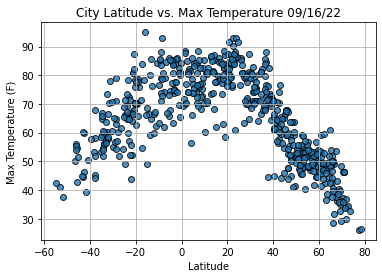

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_plot1.png")

# Show plot.
plt.show()

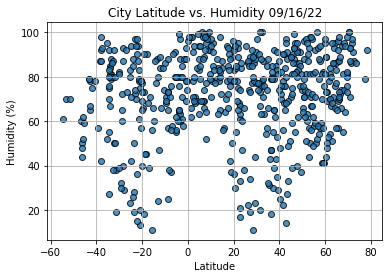

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_plot2.png")
# Show plot.
plt.show()

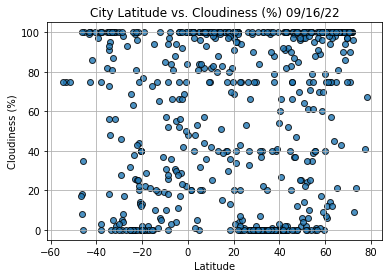

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_plot3.png")
# Show plot.
plt.show()

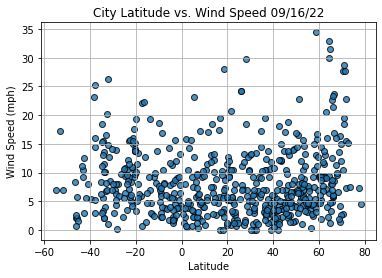

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_plot4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

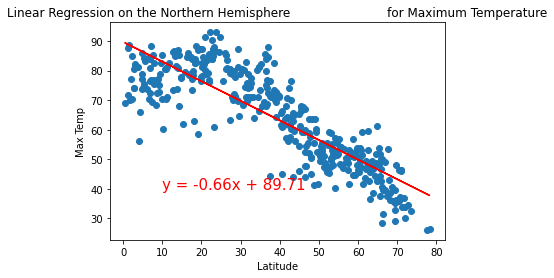

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

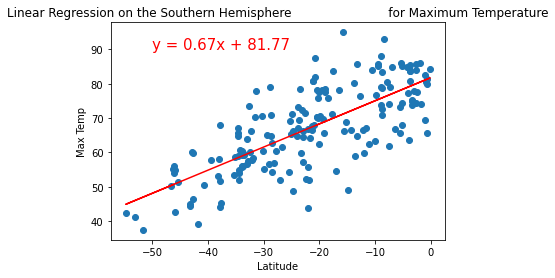

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

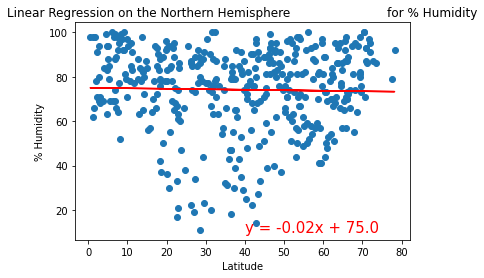

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

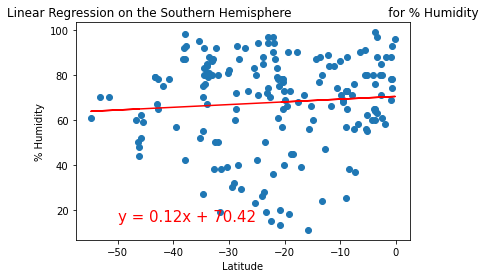

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

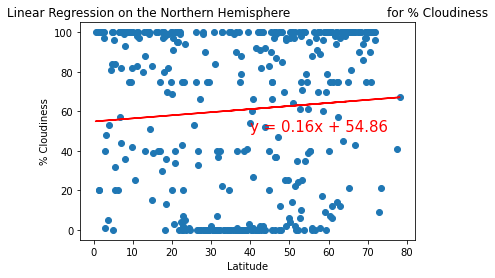

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

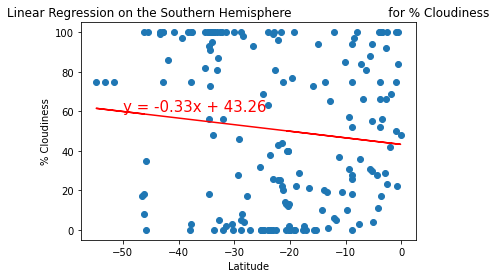

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

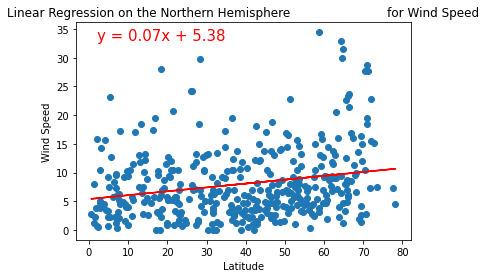

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(2,33))

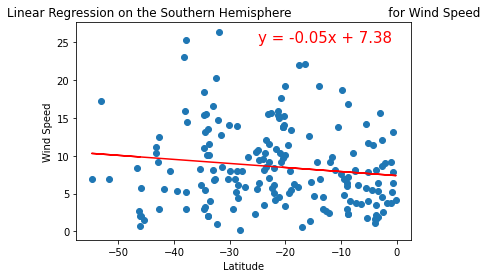

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,25))